In [1]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/pmdar/Downloads/ICRISAT-District Level Data.xlsx"
xls = pd.ExcelFile(file_path)

# Display available sheets
print(xls.sheet_names)


['ICRISAT-District Level Data']


In [2]:
# Load the first sheet into a DataFrame
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Display the first five rows
print(df.head())


   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Missing Values:
 Series([], dtype: int64)
Number of duplicate rows: 0


In [28]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Fill missing values (forward fill method as an example)
df.ffill(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'year' column to integer
df['year'] = df['year'].astype(int)

print("Data cleaning completed successfully!")


Data cleaning completed successfully!


In [31]:
df.to_csv("cleaned_agriculture_data.csv", index=False)
print("Cleaned data saved as 'cleaned_agriculture_data.csv'")


Cleaned data saved as 'cleaned_agriculture_data.csv'


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load cleaned dataset
df = pd.read_csv("cleaned_agriculture_data.csv")


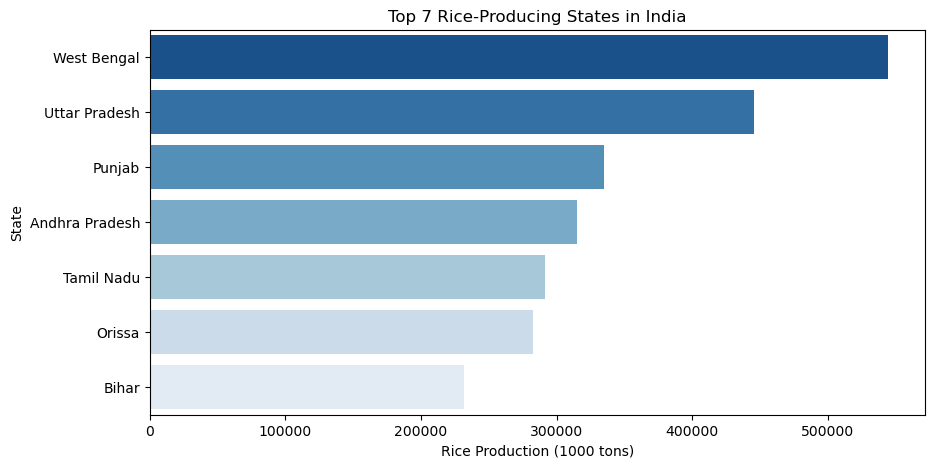

In [39]:
# Group by state and sum rice production
top_rice_states = df.groupby("state_name")["rice_production_(1000_tons)"].sum().nlargest(7)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rice_states.values, y=top_rice_states.index, hue=top_rice_states.index, palette="Blues_r", legend=False)

plt.xlabel("Rice Production (1000 tons)")
plt.ylabel("State")
plt.title("Top 7 Rice-Producing States in India")
plt.show()


C:\Users\pmdar\AppData\Local\Temp\ipykernel_26848\2446369119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wheat_states.values, y=top_wheat_states.index, palette="Oranges_r")


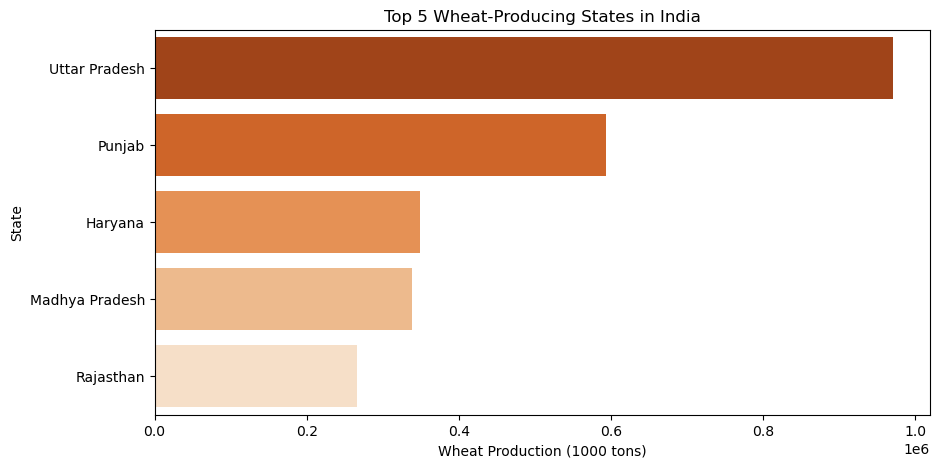

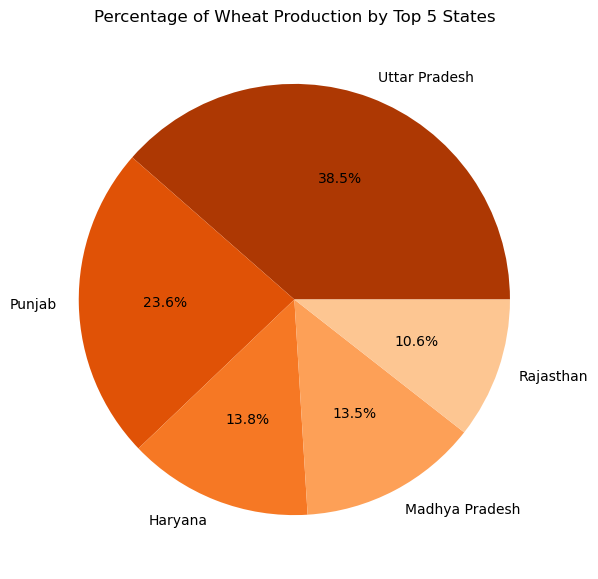

In [41]:
# Group by state and sum wheat production
top_wheat_states = df.groupby("state_name")["wheat_production_(1000_tons)"].sum().nlargest(5)

# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_wheat_states.values, y=top_wheat_states.index, palette="Oranges_r")
plt.xlabel("Wheat Production (1000 tons)")
plt.ylabel("State")
plt.title("Top 5 Wheat-Producing States in India")
plt.show()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(top_wheat_states, labels=top_wheat_states.index, autopct="%1.1f%%", colors=sns.color_palette("Oranges_r"))
plt.title("Percentage of Wheat Production by Top 5 States")
plt.show()


C:\Users\pmdar\AppData\Local\Temp\ipykernel_26848\3206822887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_oilseed_states.values, y=top_oilseed_states.index, palette="Greens_r")


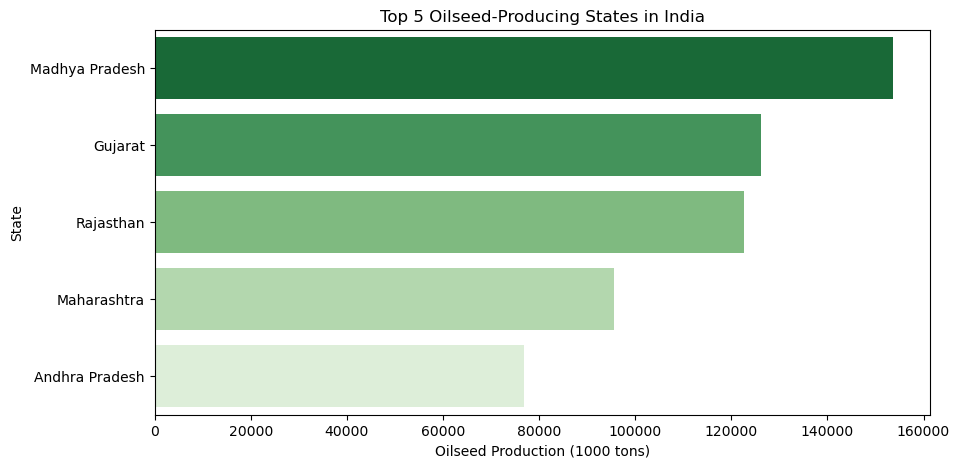

In [61]:
# Group by state and sum oilseed production
top_oilseed_states = df.groupby("state_name")["oilseeds_production_(1000_tons)"].sum().nlargest(5)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_oilseed_states.values, y=top_oilseed_states.index, palette="Greens_r")
plt.xlabel("Oilseed Production (1000 tons)")
plt.ylabel("State")
plt.title("Top 5 Oilseed-Producing States in India")
plt.show()


C:\Users\pmdar\AppData\Local\Temp\ipykernel_26848\1120624115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sunflower_states.values, y=top_sunflower_states.index, palette="YlOrBr")


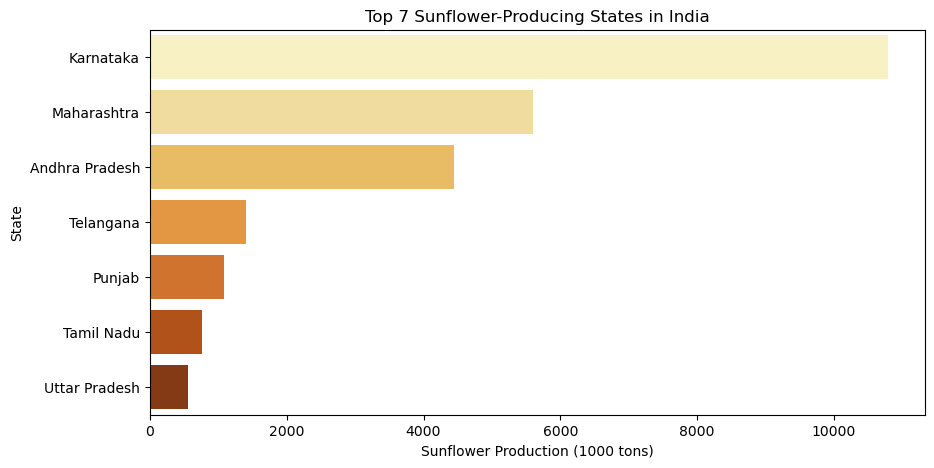

In [63]:
# Group by state and sum sunflower production
top_sunflower_states = df.groupby("state_name")["sunflower_production_(1000_tons)"].sum().nlargest(7)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sunflower_states.values, y=top_sunflower_states.index, palette="YlOrBr")
plt.xlabel("Sunflower Production (1000 tons)")
plt.ylabel("State")
plt.title("Top 7 Sunflower-Producing States in India")
plt.show()


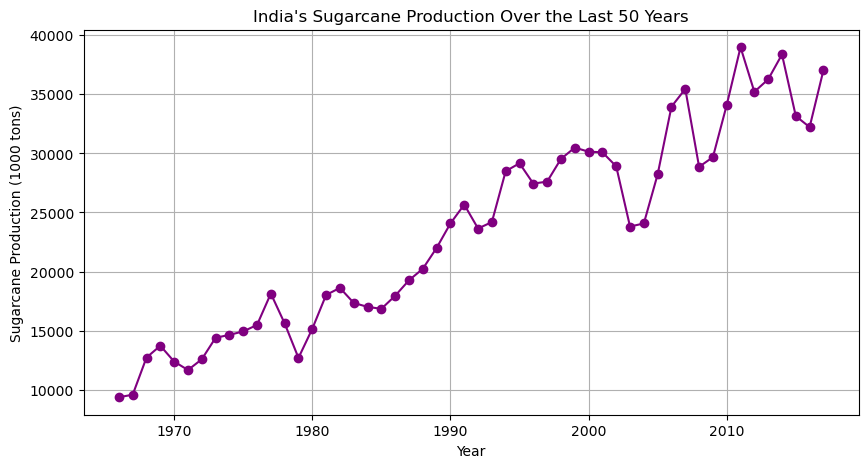

In [65]:
# Group by year and sum sugarcane production
sugarcane_trend = df.groupby("year")["sugarcane_production_(1000_tons)"].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sugarcane_trend, marker="o", linestyle="-", color="purple")
plt.xlabel("Year")
plt.ylabel("Sugarcane Production (1000 tons)")
plt.title("India's Sugarcane Production Over the Last 50 Years")
plt.grid(True)
plt.show()


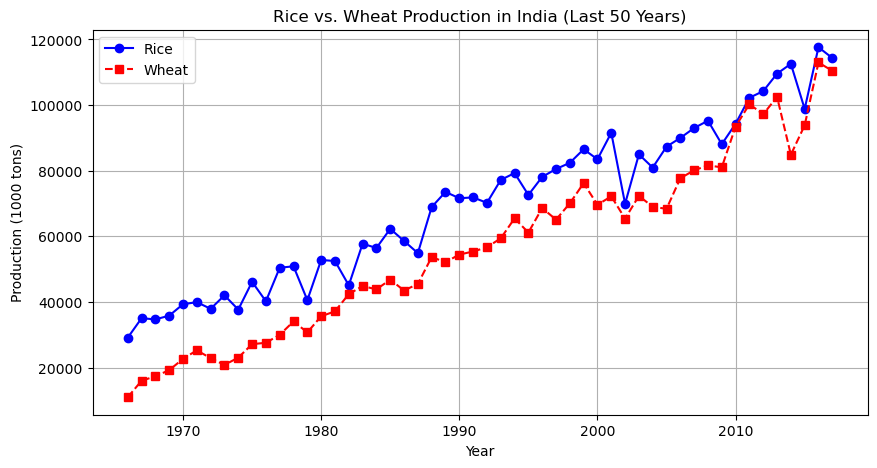

In [67]:
# Group by year and sum rice & wheat production
rice_trend = df.groupby("year")["rice_production_(1000_tons)"].sum()
wheat_trend = df.groupby("year")["wheat_production_(1000_tons)"].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(rice_trend, marker="o", linestyle="-", color="b", label="Rice")
plt.plot(wheat_trend, marker="s", linestyle="--", color="r", label="Wheat")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.title("Rice vs. Wheat Production in India (Last 50 Years)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\pmdar\AppData\Local\Temp\ipykernel_26848\2781696484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wb_rice.values, y=wb_rice.index, palette="Blues_d")


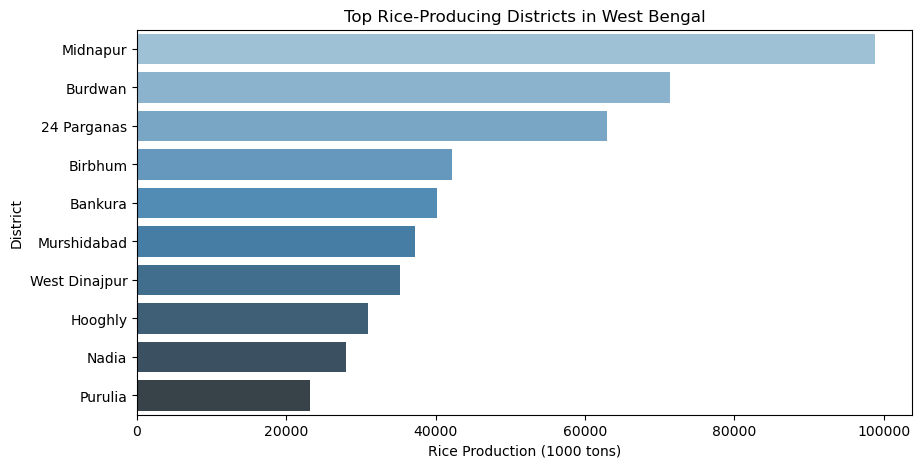

In [69]:
# Filter data for West Bengal
wb_rice = df[df["state_name"] == "West Bengal"].groupby("dist_name")["rice_production_(1000_tons)"].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=wb_rice.values, y=wb_rice.index, palette="Blues_d")
plt.xlabel("Rice Production (1000 tons)")
plt.ylabel("District")
plt.title("Top Rice-Producing Districts in West Bengal")
plt.show()


C:\Users\pmdar\AppData\Local\Temp\ipykernel_26848\2574234816.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=up_wheat.values, y=up_wheat.index, palette="Reds_r")


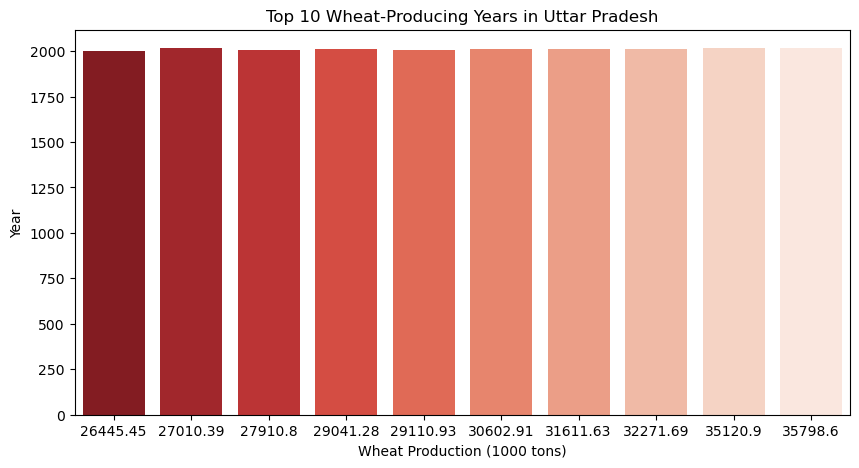

In [71]:
# Filter data for Uttar Pradesh
up_wheat = df[df["state_name"] == "Uttar Pradesh"].groupby("year")["wheat_production_(1000_tons)"].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=up_wheat.values, y=up_wheat.index, palette="Reds_r")
plt.xlabel("Wheat Production (1000 tons)")
plt.ylabel("Year")
plt.title("Top 10 Wheat-Producing Years in Uttar Pradesh")
plt.show()


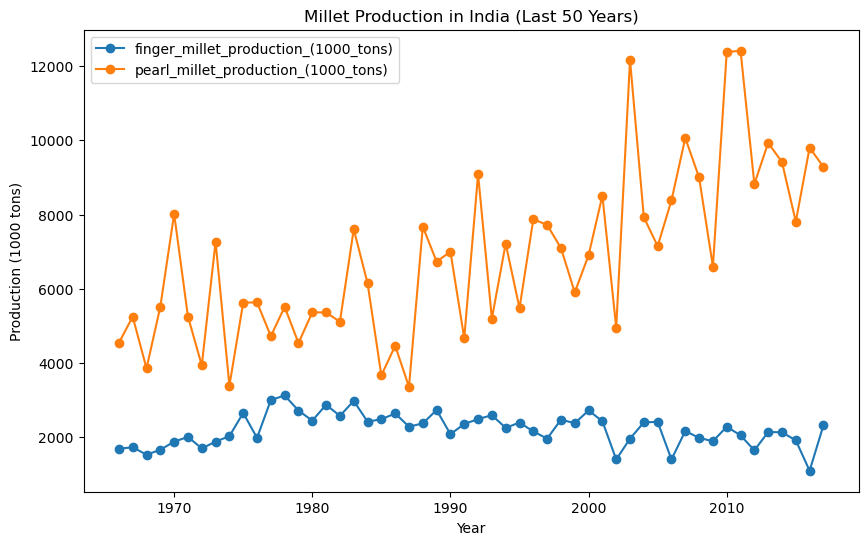

In [31]:
#Millet Production (Last 50 years)
millet = df.groupby("year")[["finger_millet_production_(1000_tons)", 
                             "pearl_millet_production_(1000_tons)"]].sum()
millet.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Millet Production in India (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Year")
plt.show()

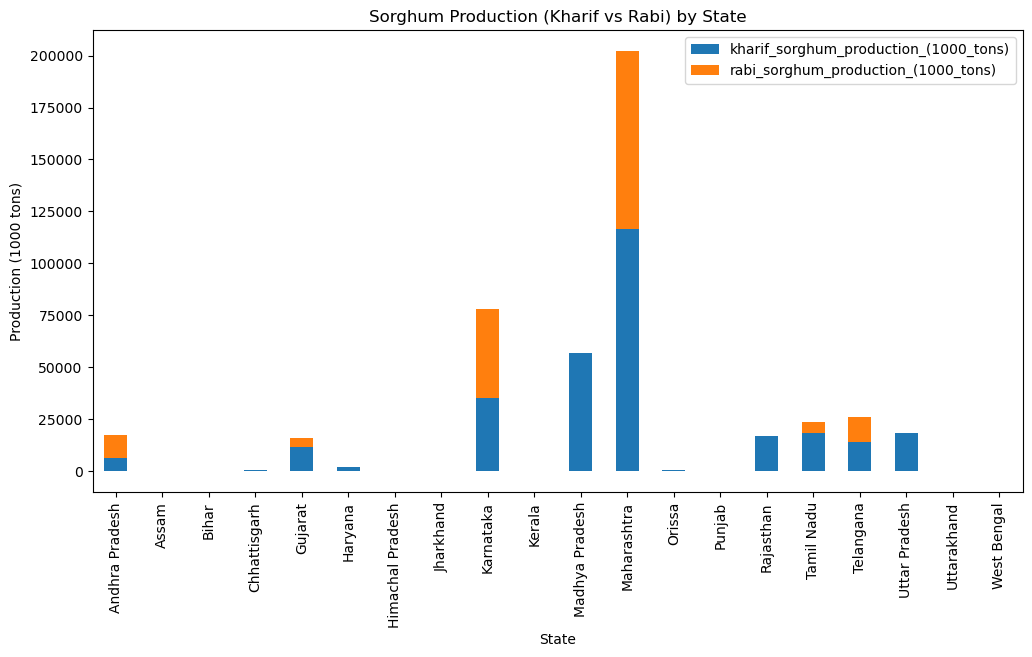

In [29]:
#Sorghum Production (Kharif and Rabi) by Region (State)
sorghum = df.groupby("state_name")[["kharif_sorghum_production_(1000_tons)", 
                                    "rabi_sorghum_production_(1000_tons)"]].sum()
sorghum.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Sorghum Production (Kharif vs Rabi) by State")
plt.ylabel("Production (1000 tons)")
plt.xlabel("State")
plt.show()

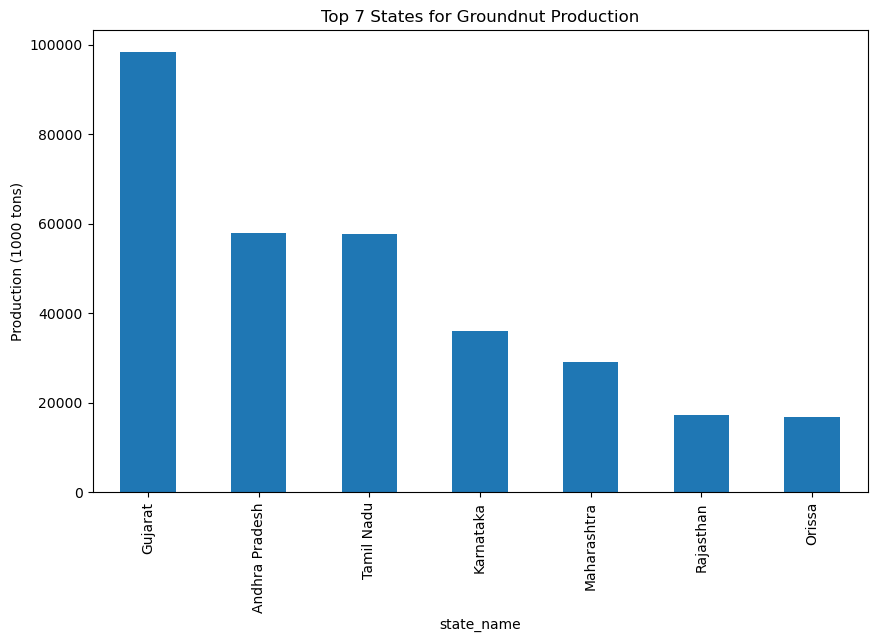

In [27]:
#Top 7 States for Groundnut Production
groundnut = df.groupby("state_name")["groundnut_production_(1000_tons)"].sum().sort_values(ascending=False).head(7)
groundnut.plot(kind="bar", figsize=(10,6))
plt.title("Top 7 States for Groundnut Production")
plt.ylabel("Production (1000 tons)")
plt.show()

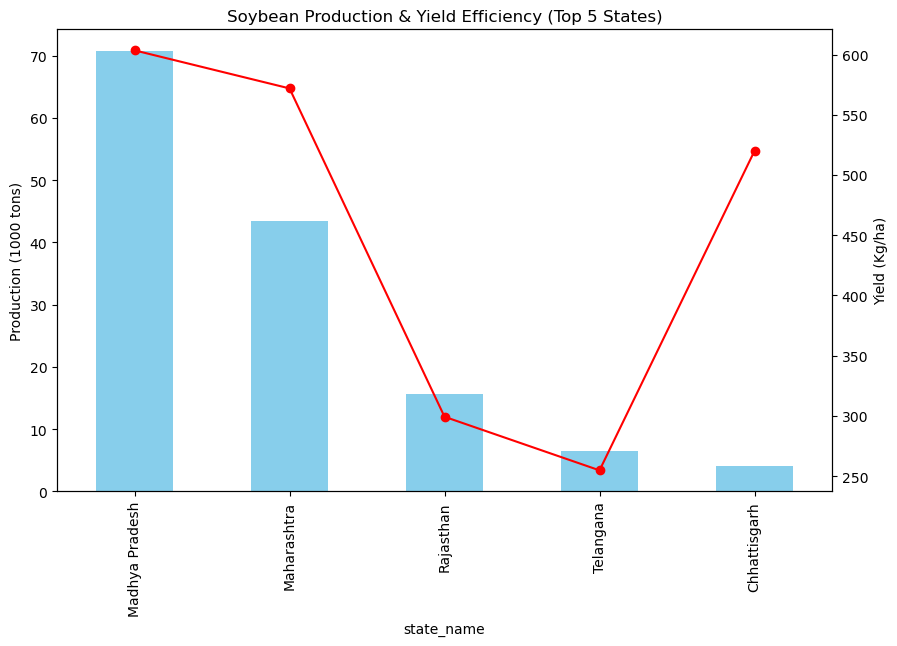

In [21]:
#Soybean Production by Top 5 States and Yield Efficiency
soy = df.groupby("state_name")[["soyabean_production_(1000_tons)", "soyabean_yield_(kg_per_ha)"]].mean()
top5_soy = soy.sort_values("soyabean_production_(1000_tons)", ascending=False).head(5)
fig, ax1 = plt.subplots(figsize=(10,6))
top5_soy["soyabean_production_(1000_tons)"].plot(kind="bar", ax=ax1, color="skyblue", label="Production")
ax2 = ax1.twinx()
top5_soy["soyabean_yield_(kg_per_ha)"].plot(kind="line", marker="o", color="red", ax=ax2, label="Yield Efficiency")
ax1.set_ylabel("Production (1000 tons)")
ax2.set_ylabel("Yield (Kg/ha)")
plt.title("Soybean Production & Yield Efficiency (Top 5 States)")
plt.show()

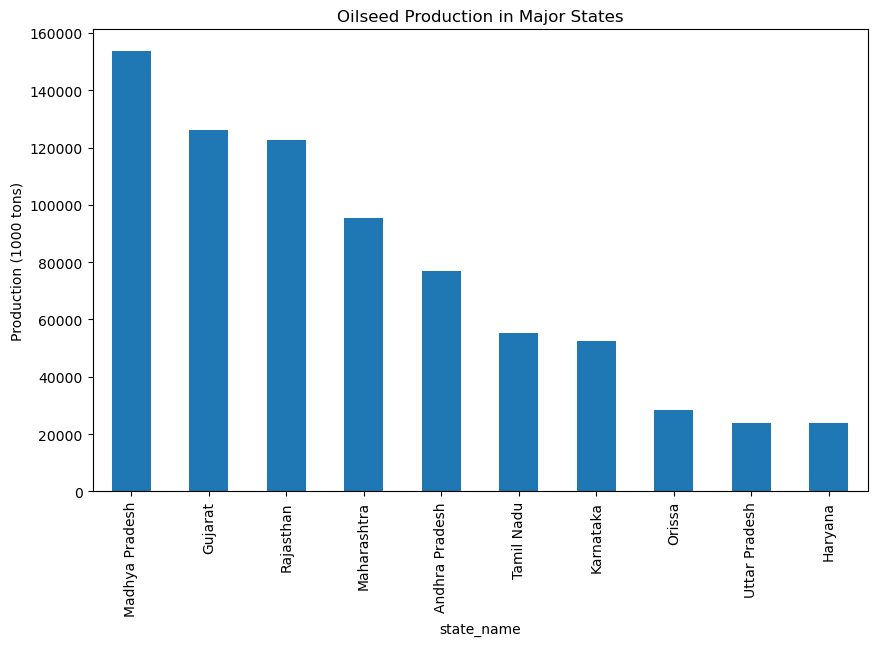

In [23]:
#Oilseed Production in Major States
oil = df.groupby("state_name")["oilseeds_production_(1000_tons)"].sum().sort_values(ascending=False).head(10)
oil.plot(kind="bar", figsize=(10,6))
plt.title("Oilseed Production in Major States")
plt.ylabel("Production (1000 tons)")
plt.show()


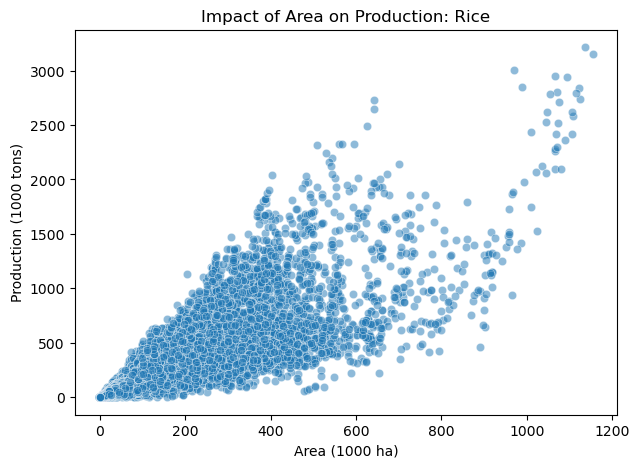

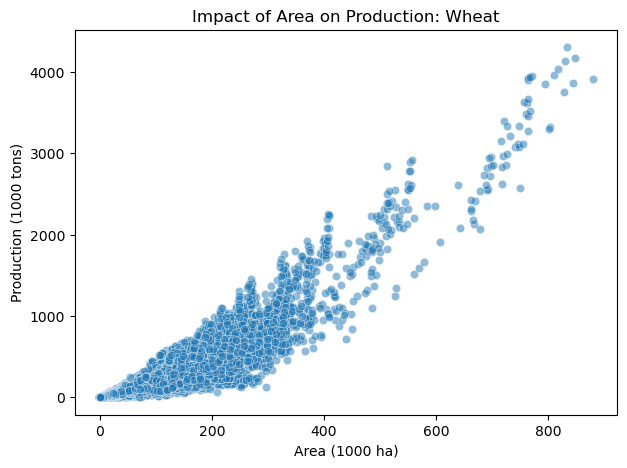

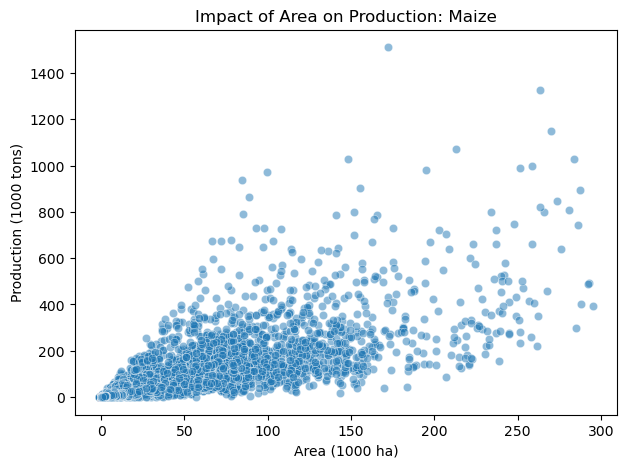

In [25]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
for crop in [("rice_area_(1000_ha)", "rice_production_(1000_tons)", "Rice"),
             ("wheat_area_(1000_ha)", "wheat_production_(1000_tons)", "Wheat"),
             ("maize_area_(1000_ha)", "maize_production_(1000_tons)", "Maize")]:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=crop[0], y=crop[1], alpha=0.5)
    plt.title(f"Impact of Area on Production: {crop[2]}")
    plt.xlabel("Area (1000 ha)")
    plt.ylabel("Production (1000 tons)")
    plt.show()


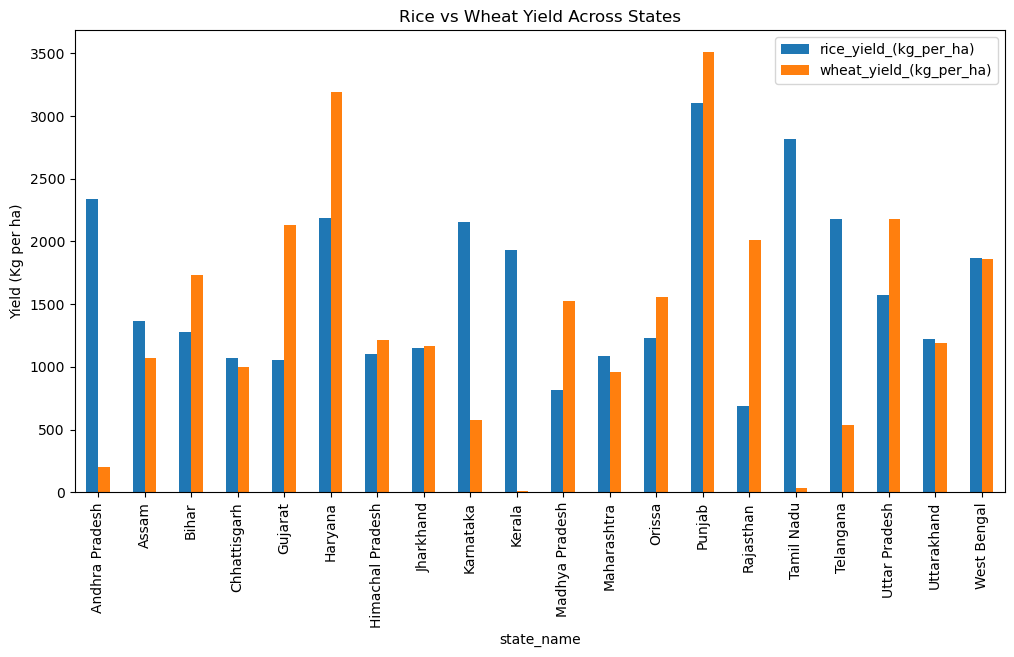

In [33]:
#Rice vs Wheat Yield Across States
yield_comp = df.groupby("state_name")[["rice_yield_(kg_per_ha)", "wheat_yield_(kg_per_ha)"]].mean().dropna()
yield_comp.plot(kind="bar", figsize=(12,6))
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield (Kg per ha)")
plt.show()